# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

## Olusola Timothy Ogundepo

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read csv
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

## Data overview

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the description of this dataset, am highly interested in 2 features because of the differences between mean and max of both **total sulfur dioxide** and **free sulfur dioxide**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the independent variable in this dataset are all $float64$ while the target variable is $int64$

In [6]:
df.shape

(1599, 12)

12 columns with 1599 observations

### Checking for NAN values or ?

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.apply(lambda x: x.isin(['?'])).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NAN or unknown values in this dataset

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of wine quality')

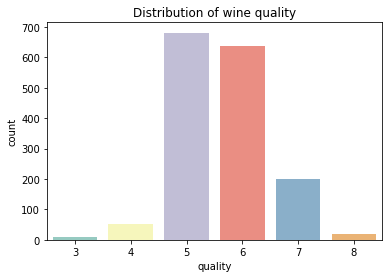

In [9]:
# Our label Distribution (countplot)
ax = sns.countplot(data=df, x='quality', palette='Set3')
ax.set_title("Distribution of wine quality")

We could say that there is class imbalance in this dataset which will make our model to perform well on both 5 and 6 wine quality

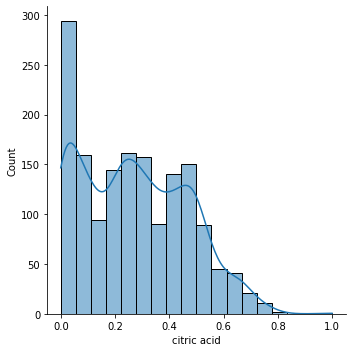

In [10]:
# Example EDA (distplot)
sns.displot(df['citric acid'], kde=True)

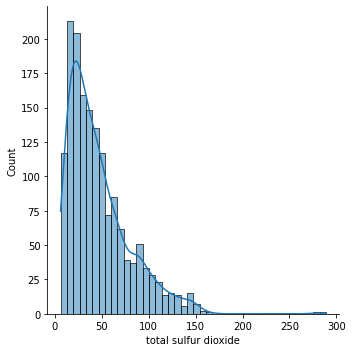

In [11]:
sns.displot(df['total sulfur dioxide'], kde=True)

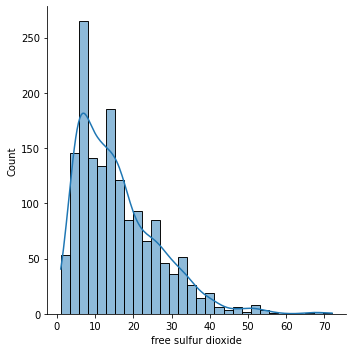

In [12]:
sns.displot(df['free sulfur dioxide'], kde=True)

This dataset is not normally distributed and it also contains outlier

<AxesSubplot:>

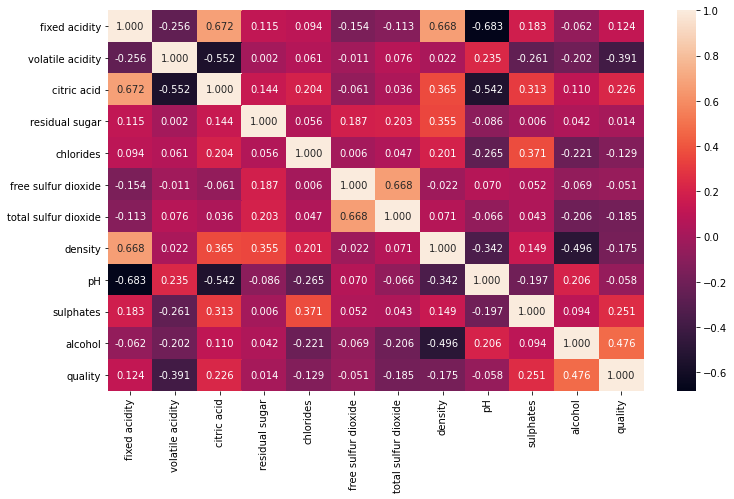

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, fmt='.3f')

From above visual, we could see the correlation in our dataset

# Preprocessing

In [14]:
from scipy.stats import zscore

In [15]:
np.sum((zscore(df) > 3))

174

We have 174 outliers in this dataset, which we need to remove to make our model perform well.

- Are there any duplicated values?

In [16]:
df.duplicated().sum()

240

We have 240 duplicated values in our dataset

- Do we need to do feature scaling?

This depends on which machine learning algorithm we wanted to use,

for example; if we want to use decision tree actually we don't need to do any feature scaling because it will handle it for us.
But for the case of this dataset, I will highly suggest we do feature scaling.

In [17]:
outliers = list(set(np.where(zscore(df) > 3)[0]))

In [18]:
new_df = df.drop(outliers,axis = 0)

In [19]:
new_df.drop('alcohol', axis=1, inplace=True)

In [20]:
def view(data):
    print(data.shape)
    display(data.head())

Before removing the outliers

In [21]:
view(df)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


After removing the outliers

In [22]:
view(new_df)

(1463, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


### Dimesion reduction

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(new_df.drop('quality', axis=1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

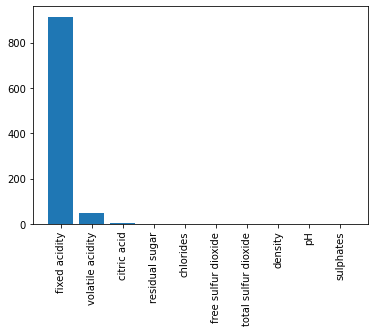

In [26]:
plt.bar(range(1, 11), pca.explained_variance_)
plt.xticks(range(1, 11), new_df.drop('quality', axis=1), rotation=90);

In [27]:
pca.explained_variance_

array([9.14389928e+02, 4.68432738e+01, 2.71398929e+00, 7.09723910e-01,
       3.76599208e-02, 1.45634839e-02, 9.23622468e-03, 8.31053002e-03,
       4.21973528e-04, 1.12502587e-06])

In [28]:
sorted(pca.explained_variance_, reverse=True)

[914.3899275845167,
 46.843273840668864,
 2.713989287352066,
 0.7097239095954194,
 0.03765992077741291,
 0.014563483938927313,
 0.009236224676849222,
 0.008310530021180726,
 0.00042197352789811153,
 1.1250258650317721e-06]

- Do we need to generate new features?

YES,
After we scale our dataset, we have to continue using the scale data

In [29]:
from sklearn.preprocessing import MinMaxScaler, scale, Normalizer, StandardScaler

In [30]:
scaler = MinMaxScaler()
new_df.loc[:, :"sulphates"] = scaler.fit_transform(new_df.drop('quality', axis=1))

After scaling

In [31]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,0.282353,0.630435,0.000000,0.172414,0.299065,0.217391,0.201439,0.637263,0.724138,0.277108,5
1,0.329412,0.826087,0.000000,0.293103,0.401869,0.521739,0.438849,0.554823,0.367816,0.421687,5
2,0.329412,0.695652,0.050633,0.241379,0.373832,0.304348,0.345324,0.571311,0.436782,0.385542,5
3,0.729412,0.173913,0.708861,0.172414,0.294393,0.347826,0.388489,0.653751,0.321839,0.301205,6
4,0.282353,0.630435,0.000000,0.172414,0.299065,0.217391,0.201439,0.637263,0.724138,0.277108,5


- Split Train and Test dataset. (0.7/0.3)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns=['quality']), new_df['quality'], test_size=.3, random_state=56)

In [34]:
X_dftrain, X_dftest, y_dftrain, y_dftest = train_test_split(df.drop(columns=['quality']), df['quality'], test_size=.3, random_state=56)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [35]:
from sklearn.metrics import classification_report
def view_metrics(md):
    md.fit(X_train, y_train)
    print("Training accuracy:", md.score(X_train, y_train), '\n')
    print("Testing accuracy:", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(X_test)

In [36]:
def view_dfmetrics(md):
    md.fit(X_dftrain, y_dftrain)
    print("Training accuracy:", md.score(X_dftrain, y_dftrain), '\n')
    print("Testing accuracy:", md.score(X_dftest, y_dftest), '\n')
    print(classification_report(y_dftest, md.predict(X_dftest)))

* I train the model with data that was process and without.
* And I print the report for each data prediction and also return their prediction

In [37]:
def confusion_pred(model, pred):
    plt.figure(figsize=(12, 9))
    matrix = confusion_matrix(y_test, pred)
    ax =sns.heatmap(matrix, square=True, annot=True, fmt='1d')
    ax.xaxis.set_ticklabels(range(3, 9), fontsize = 12)
    ax.yaxis.set_ticklabels(range(3, 9), fontsize = 12, rotation=0)
    ax.set_title(f'Confusion matrix for {model.__class__.__name__} on the testing set',fontsize = 15)
    ax.set_xlabel('Predicted Labels',fontsize = 14)
    ax.set_ylabel('True Labels',fontsize = 14)

* I'll generate confusion matrix with the above method

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dc = DecisionTreeClassifier(random_state=32)

In [40]:
dc_pred = view_metrics(dc)

Training accuracy: 1.0 

Testing accuracy: 0.6309794988610479 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.15      0.13      0.14        15
           5       0.73      0.67      0.70       186
           6       0.62      0.71      0.66       170
           7       0.53      0.52      0.52        58
           8       0.25      0.14      0.18         7

    accuracy                           0.63       439
   macro avg       0.38      0.36      0.37       439
weighted avg       0.63      0.63      0.63       439



In [41]:
help(''.rjust)

Help on built-in function rjust:

rjust(width, fillchar=' ', /) method of builtins.str instance
    Return a right-justified string of length width.
    
    Padding is done using the specified fill character (default is a space).



In [42]:
from collections import Counter

In [43]:
for i, j in Counter(dc_pred).items():
    print(i, "--->", j)
print('Total predictions:', sum(Counter(dc_pred).values()))

6 ---> 195
5 ---> 170
7 ---> 57
4 ---> 13
8 ---> 4
Total predictions: 439


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
y_test.unique()

array([5, 6, 4, 7, 8, 3], dtype=int64)

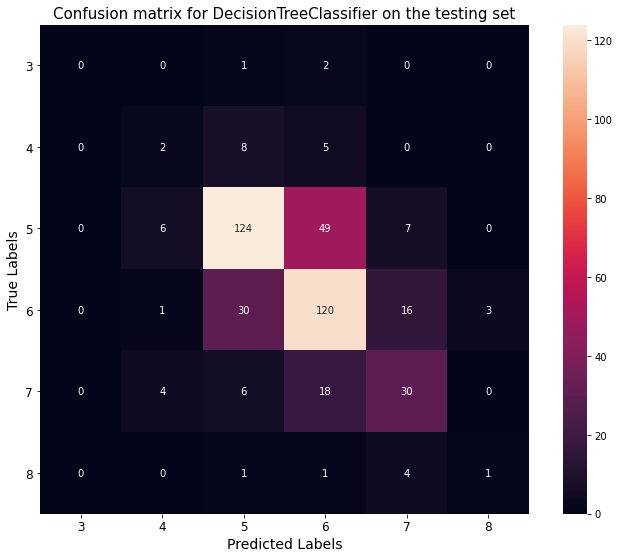

In [46]:
confusion_pred(dc, dc_pred)

In [47]:
view_dfmetrics(dc)

Training accuracy: 1.0 

Testing accuracy: 0.5895833333333333 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.66      0.70      0.68       201
           6       0.61      0.60      0.60       199
           7       0.44      0.44      0.44        54
           8       0.00      0.00      0.00         6

    accuracy                           0.59       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.58      0.59      0.58       480



# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log = LogisticRegression(solver='liblinear', C=0)

In [50]:
log_pred = view_metrics(log)

Training accuracy: 0.59765625 

Testing accuracy: 0.5649202733485194 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.62      0.72      0.67       186
           6       0.50      0.60      0.55       170
           7       0.67      0.21      0.32        58
           8       0.00      0.00      0.00         7

    accuracy                           0.56       439
   macro avg       0.30      0.25      0.25       439
weighted avg       0.54      0.56      0.53       439



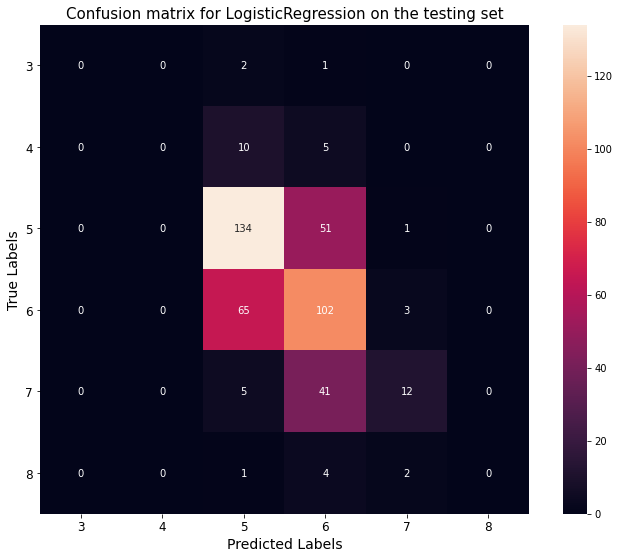

In [51]:
confusion_pred(log, log_pred)

In [52]:
view_dfmetrics(log)

Training accuracy: 0.5907059874888293 

Testing accuracy: 0.5916666666666667 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.62      0.77      0.69       201
           6       0.56      0.61      0.58       199
           7       0.53      0.15      0.23        54
           8       0.00      0.00      0.00         6

    accuracy                           0.59       480
   macro avg       0.29      0.25      0.25       480
weighted avg       0.55      0.59      0.56       480



# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [55]:
knn_pred = view_metrics(knn)

Training accuracy: 0.7041015625 

Testing accuracy: 0.5831435079726651 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.07      0.10        15
           5       0.65      0.69      0.67       186
           6       0.54      0.63      0.58       170
           7       0.56      0.33      0.41        58
           8       0.00      0.00      0.00         7

    accuracy                           0.58       439
   macro avg       0.32      0.29      0.29       439
weighted avg       0.56      0.58      0.57       439



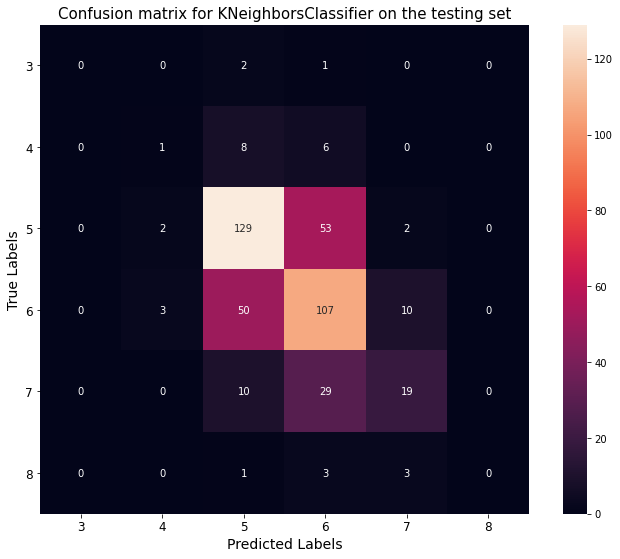

In [56]:
confusion_pred(knn, knn_pred)

# RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
knn = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, criterion='entropy', max_depth=10)

In [59]:
knn_pred = view_metrics(knn)

Training accuracy: 0.982421875 

Testing accuracy: 0.6605922551252847 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.69      0.76      0.72       186
           6       0.61      0.72      0.66       170
           7       0.72      0.45      0.55        58
           8       1.00      0.14      0.25         7

    accuracy                           0.66       439
   macro avg       0.50      0.34      0.36       439
weighted avg       0.64      0.66      0.64       439



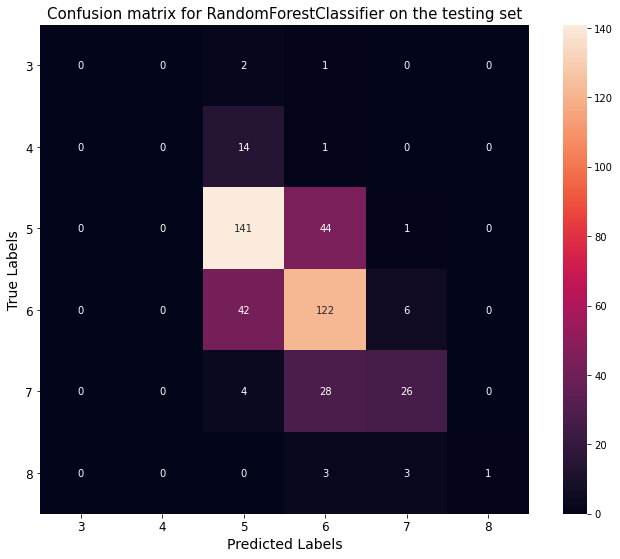

In [60]:
confusion_pred(knn, knn_pred)

# Counting the actual value for the prediction

In [61]:
y_test.value_counts()

5    186
6    170
7     58
4     15
8      7
3      3
Name: quality, dtype: int64

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.